# Ensemble Methods Project
By Josh Houlding

Ensemble learning is a general approach where the combination of related methods provides better predictions or improves overall performance. Some real-world examples of its use include the Netflix Challenge, gene classification, image segmentation, and video retrieval.

In this assignment, you will implement ensemble learning, combining a variety of learning methods such as max voting, averaging, weighted averaging, bagging, boosting (gradient boosting, random forest, XGBoost, etc.), stacking, blending, and other variations.

You will have the freedom to choose between implementing classification or regression machine learning, or a combination of the two, so choose your ensemble techniques accordingly.

# Part 1

1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10 attributes and 10,000 instances
2. Ensure that the datasets are suitable for clustering using this method.
3. You may search for data in other repositories, such as Data.gov or Kaggle.

# Part 2

For your selected dataset, build an ensemble model as follows:
1. Explain the dataset and the type of information you wish to gain by applying an ensemble method.
2. Explain the ensemble components and how you will be using it in your analysis (list the steps, intuition behind the mathematical representation, and address its assumptions). Specifically, which of max voting, averaging, weighted averaging, bagging, boosting (gradient boosting, random forest, XGBoost, etc.), stacking, blending, and/or other variations have you chosen, and why.
3. Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by employing the ensemble learning
6. If appropriate and relevant to your model, split the data into training and testing sets.
7. Provide a diagram that illustrates how the ensemble components are combined into one learning model.
8. Implement and execute the ensemble learning model. Explain the intuition behind each mathematical step.
9. Answer the questions you formulated using the results obtained from executing the ensemble model.
10. Interpret the predictions made by the model in the context of the questions you asked.
11. Validate your model using relevant validation metrics such as a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.
12. Explain how ensemble system reduced the variance.
13. Include all mathematical formulas used and graphs representing the final outcomes.

# <span style="color:#8080ff">Part 1</span>

# Tasks 1.1-1.3

<b>1.1:</b><i> Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 data sets that are suitable for use in a clustering task. For this part of the exercise, you must choose two of these datasets, provided they include at least 10 attributes and 10,000 instances.</i>

<b>1.2:</b><i> Ensure that the data sets are suitable for clustering using this method.</i>

<b>1.3:</b><i> You may search for data in other repositories, such as Data.gov or Kaggle.</i>

<b>Dataset Selected:</b> "Weather Type Classification" (Kaggle) <br>
<b>Tagline:</b> "This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods." <br>
<b>Link:</b> https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

# <span style="color:#1f6635">Part 2</span>

# Task 2.1
<i>Explain the dataset and the type of information you wish to gain by applying an ensemble method.</i>

This dataset is a synthetically-generated collection of weather instances, and is intended for use in classification models to predict the weather type (rainy, sunny, cloudy, or snowy) based on factors like temperature, humidity, wind speed, and season. An ensemble method can be used to build a robust classification model that will predict the type of weather on a given day based on the features provided.

# Task 2.2
<i>Explain the ensemble components and how you will be using it in your analysis (list the steps, intuition behind the mathematical representation, and address its assumptions). Specifically, which of max voting, averaging, weighted averaging, bagging, boosting (gradient boosting, random forest, XGBoost, etc.), stacking, blending, and/or other variations have you chosen, and why.</i>

I will be using the Random Forest and XGBoost algorithms to generate initial predictions, and then stacking to combine these two predictions into one final prediction. To go into more detail: 

* <b>Random Forest</b> is a bagging technique that relies on multiple decision trees. Each tree is trained using a random subset of the data and features, and the final prediction made by a random forest is usually the mode (most common value) of individual tree predictions. Random forests work well with mixed data types, are more robust against overfitting than individual decision trees, and are effective at capturing nonlinear relationships in the data. The only major assumption made by a random forest is that the selected features have at least some utility in predicting the label.
* <b>XGBoost (Extreme Gradient Boosting)</b> is a boosting algorithm that builds trees sequentially, with each tree correcting the errors of all the previous ones. The overall algorithm attempts to minimize a loss function using gradient descent. Like random forests, XGBoost is also highly resistant to overfitting, and it is also efficient to run. This algorithm assumes that the true underlying function can be approximated by the iterative process of creating trees that correct the errors of their predecessors.
* Finally, <b>stacking</b> is a meta-ensemble method that uses another model to rigorously combine predictions from multiple other models. It is more capable of leveraging the strengths of each previous model than any of the simpler aggregation techniques (eg. max voting), because it can take into account the characteristics of the data rather than simply relying on a fixed rule. This is the tool we'll be using to combine the results of our random forest and XGBoost models.

# Task 2.3
<i>Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.</i>

### Loading the data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("weather_classification_data.csv")
print(f"Data shape: {df.shape}")
df.sample(5, random_state=42)

Data shape: (13200, 11)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
4111,23.0,38,4.5,6.0,clear,1021.19,9,Autumn,10.0,inland,Sunny
10607,62.0,94,14.5,83.0,clear,1025.57,10,Summer,4.0,inland,Sunny
7372,40.0,51,2.0,12.0,partly cloudy,1025.15,8,Spring,8.0,mountain,Sunny
11786,-7.0,79,6.5,90.0,overcast,993.56,0,Winter,1.5,inland,Snowy
12227,21.0,94,10.0,109.0,partly cloudy,1027.71,11,Spring,9.0,mountain,Sunny


### Variable information (from Kaggle page)
* `Temperature` (°C) (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
* `Humidity` (%) (numeric): The humidity percentage, including values above 100% to introduce outliers.
* `Wind Speed` (km/h) (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
* `Precipitation` (%) (numeric): The precipitation percentage, including outlier values.
* `Cloud Cover` (categorical): The cloud cover description.
* `Atmospheric Pressure` (hPa) (numeric): The atmospheric pressure in hPa, covering a wide range.
* `UV Index` (numeric): The UV index, indicating the strength of ultraviolet radiation.
* `Season` (categorical): The season during which the data was recorded.
* `Visibility` (km) (numeric): The visibility in kilometers, including very low or very high values.
* `Location` (categorical): The type of location where the data was recorded.
* `Weather Type` (categorical): The target variable for classification, indicating the weather type.

### Renaming columns

In [2]:
# Create new names for columns
new_column_mapping = {"Temperature": "temperature", "Humidity": "humidity", "Wind Speed": "wind_speed",
                      "Precipitation (%)": "precipitation", "Cloud Cover": "cloud_cover", 
                      "Atmospheric Pressure": "atmos_pressure", "UV Index": "uv_index", "Season": "season", 
                      "Visibility (km)": "visibility", "Location": "location", "Weather Type": "weather_type"}

# Apply mapping to dataframe
df.rename(columns=new_column_mapping, inplace=True)

# Show new column names
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation', 'cloud_cover',
       'atmos_pressure', 'uv_index', 'season', 'visibility', 'location',
       'weather_type'],
      dtype='object')

### Showing descriptive statistics for numeric features

In [3]:
# Show descriptive statistics for numeric features
df.describe().round(3)

,temperature,humidity,wind_speed,precipitation,atmos_pressure,uv_index,visibility
count,13200.000,13200.000,13200.000,13200.000,13200.000,13200.000,13200.000
mean,19.128,68.711,9.832,53.644,1005.828,4.006,5.463
std,17.386,20.194,6.909,31.947,37.200,3.857,3.371
min,-25.000,20.000,0.000,0.000,800.120,0.000,0.000
25%,4.000,57.000,5.000,19.000,994.800,1.000,3.000
50%,21.000,70.000,9.000,58.000,1007.650,3.000,5.000
75%,31.000,84.000,13.500,82.000,1016.772,7.000,7.500
max,109.000,109.000,48.500,109.000,1199.210,14.000,20.000


We see that the max humidity and precipitation values are 109, which doesn't make sense when we consider that these features are expressed as percentages. The max temperature is 109 degrees Celsius as well, which is above boiling! The dataset description on Kaggle does say this, however: 
> This dataset is synthetically produced and does not convey real-world weather data. <span style="color:red">It includes intentional outliers to provide opportunities for practicing outlier detection and handling </span>. The values, ranges, and distributions may not accurately represent real-world conditions, and the data should primarily be used for educational and experimental purposes.

These outliers will need to be corrected later on to ensure model accuracy.

### Showing value counts for categorical features

In [4]:
# Show value counts for categorical features
for col in df.columns: 
    if df[col].dtype == "O": 
        print(df[col].value_counts(), "\n")

cloud_cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64 

season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64 

location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64 

weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64 



* `cloud_cover`: We see that cloudy days are severely underrepresented, with overcast and partly cloudy being far more common.
* `season`: Winter days are far more common than any other season, with all three of the other seasons being about equally common.
* `location`: Locations are moderately well-distributed, with a slight lack of coastal locations.
* `weather_type`: All weather types are equally present, ensuring no class imbalance is present. This means that the model will not be under-trained on any particular weather type, preventing poor performance with less common ones.

### Showing dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     13200 non-null  float64
 1   humidity        13200 non-null  int64  
 2   wind_speed      13200 non-null  float64
 3   precipitation   13200 non-null  float64
 4   cloud_cover     13200 non-null  object 
 5   atmos_pressure  13200 non-null  float64
 6   uv_index        13200 non-null  int64  
 7   season          13200 non-null  object 
 8   visibility      13200 non-null  float64
 9   location        13200 non-null  object 
 10  weather_type    13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


There are several categorical variables in our data that will need to be encoded to a numeric format for modeling.

# Task 2.4
<i>Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.</i>

### Removing duplicates

In [6]:
# Find number of duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


There are no duplicates present in this dataset, so duplicates will not be a problem.

### Handling missing values

In [7]:
# Find number of rows with missing values
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

Number of rows with missing values: 0


There are no missing values either.

### Setting all categorical values to lowercase
This will ensure the dummy variable columns created for our categorical columns will be lowercase. 

In [8]:
for col in df.columns: 
    if df[col].dtype == "O": 
        df[col] = df[col].str.lower()

### Converting data types
We will now perform the following steps: 
* Apply one-hot encoding to the categorical features `cloud_cover`, `season`, and `location` (outputs columns of type `bool`). 
* Convert new dummy columns to `int` for modeling.
* Convert the label `weather_type` to `int` using label encoding.

In [9]:
# Apply one-hot encoding to categorical features
df = pd.get_dummies(df, columns=["cloud_cover", "season", "location"], drop_first=True)

# Show names of new dummy columns
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation',
       'atmos_pressure', 'uv_index', 'visibility', 'weather_type',
       'cloud_cover_cloudy', 'cloud_cover_overcast',
       'cloud_cover_partly cloudy', 'season_spring', 'season_summer',
       'season_winter', 'location_inland', 'location_mountain'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert dummy columns to int datatype
for col in df.columns:
    if df[col].dtype == "bool": 
        df[col] = df[col].astype(int)
    
# Store order of original weather type values
original_label_values = df["weather_type"].unique()
    
# Convert label "weather_type" to int
encoder = LabelEncoder()
df["weather_type"] = encoder.fit_transform(df["weather_type"])

# Store order of encoded weather type values
encoded_label_values = df["weather_type"].unique()

# Show counts of final data types
df.dtypes.value_counts()

int32      9
float64    5
int64      2
Name: count, dtype: int64

### Handling outliers
We will start by capping the values of `temperature`, `humidity`, `precipitation`, and `atmos_pressure`. These cap values were decided by either logical necessity (percentages) or what is reasonable. 

* `temperature`: Cap at 50°C.
* `humidity`: Cap at 100 (100%).
* `precipitation`: Cap at 100 (100%).
* `atmos_pressure`: Cap at 1050 hPa (this is the maximum pressure of a standard high-pressure system).

In [11]:
import numpy as np

# Cap values at defined thresholds
df["temperature"] = np.where(df["temperature"] > 50, 50, df["temperature"])
df["humidity"] = np.where(df["humidity"] > 100, 100, df["humidity"])
df["precipitation"] = np.where(df["precipitation"] > 100, 100, df["precipitation"])
df["atmos_pressure"] = np.where(df["atmos_pressure"] > 1050, 1050, df["atmos_pressure"])

# View new descriptive statistics for these columns
df[["temperature", "humidity", "precipitation", "atmos_pressure"]].describe().round(3)

,temperature,humidity,precipitation,atmos_pressure
count,13200.000,13200.000,13200.000,13200.000
mean,18.706,68.548,53.496,1003.133
std,16.292,19.914,31.715,29.404
min,-25.000,20.000,0.000,800.120
25%,4.000,57.000,19.000,994.800
50%,21.000,70.000,58.000,1007.650
75%,31.000,84.000,82.000,1016.772
max,50.000,100.000,100.000,1050.000


Now that values for these columns have been capped, let's move on to dealing with general outliers. We will do this using the mean and standard deviation method, which calculates the mean and standard deviation of each numeric column and uses them to flag values that are above or below a certain threshold.

In [12]:
# Calculate mean and standard deviation
mean = df.mean()
std_dev = df.std()

# Calculate upper and lower thresholds
threshold = 3
lower_threshold = mean - threshold * std_dev
upper_threshold = mean + threshold * std_dev

# Create dataframe to store outliers
outliers = pd.DataFrame(False, index=df.index, columns=df.columns)

# Find outliers for each column
for col in df.columns:
    outliers[col] = (df[col] < lower_threshold[col]) | (df[col] > upper_threshold[col])

# Determine number of outliers
outlier_count = outliers.sum().sum()

# Print the results
print(f"Total number of entries: {len(df)}")
print(f"Number of outliers: {outlier_count}")

Total number of entries: 13200
Number of outliers: 1262


Outliers constitute almost 10% of our data, so removing them all could significantly impact the accuracy of the model. Thus, capping extreme high values and flooring extreme low values is the best approach due to its effectiveness and simplicity. Values above the upper threshold will be set equal to the upper threshold, and values below the lower threshold will be set equal to the lower threshold.

In [13]:
# Cap/floor extreme values
for col in df.columns: 
    df[col] = np.where(df[col] > upper_threshold[col], upper_threshold[col], df[col])
    df[col] = np.where(df[col] < lower_threshold[col], lower_threshold[col], df[col])  

We should not be dealing with any extreme outliers anymore, and our data will be more useful for modeling as a result.

### Normalizing features
To make the data suitable for modeling, all features must be on a $[0, 1]$ scale so a feature with a larger value range does not overpower one with a smaller range of values. We will apply normalization to every column that is not already on this scale.

In [14]:
df.head(3)

,temperature,humidity,wind_speed,precipitation,atmos_pressure,uv_index,visibility,weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_spring,season_summer,season_winter,location_inland,location_mountain
0,14.0,73.0,9.5,82.0,1010.82,2.0,3.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,39.0,96.0,8.5,71.0,1011.43,7.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,30.0,64.0,7.0,16.0,1018.72,5.0,5.5,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select columns for normalization
columns_to_normalize = ["temperature", "humidity", "wind_speed", "precipitation", "atmos_pressure", "uv_index", 
                        "visibility"]

# Initialize scaler
scaler = MinMaxScaler()

# Normalize columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Show normalized dataframe
df.sample(5, random_state=42)

,temperature,humidity,wind_speed,precipitation,atmos_pressure,uv_index,visibility,weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_spring,season_summer,season_winter,location_inland,location_mountain
4111,0.640000,0.2250,0.147259,0.06,0.786720,0.642857,0.641955,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,1.000000,0.9250,0.474503,0.83,0.819145,0.714286,0.256782,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,0.866667,0.3875,0.065449,0.12,0.816036,0.571429,0.513564,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,0.240000,0.7375,0.212708,0.90,0.582175,0.000000,0.096293,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.613333,0.9250,0.327243,1.00,0.834987,0.785714,0.577760,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


The data is now fully preprocessed and ready for modeling.

# Task 2.5
<i>Formulate two questions that can be answered by employing ensemble learning.</i>

<b>Question 1:</b> Can we predict the weather type more reliably using an ensemble model than with a single model alone? <br>
<b>Question 2:</b> Can an ensemble model reduce prediction variance compared to a single model?

Because these questions are very different, each will require a different ensemble to answer. For Q1, I will be employing random forest, XGBoost and stacking and comparing the results to those of a single model. For Q2, I will be finding the prediction variance for a random forest, XGBoost model, SVM, logistic regression model and k-nearest neighbors model individually, then combining their predictions with max voting and comparing the variance with that of each individual model. 

# Task 2.6
<i>If appropriate and relevant to your model, split the data into training and testing sets.</i>

In [16]:
from sklearn.model_selection import train_test_split

# Select features and label
x = df.drop(columns={"weather_type"})
y = df["weather_type"]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Task 2.7
<i>Provide a diagram that illustrates how the ensemble components are combined into one learning model.</i>

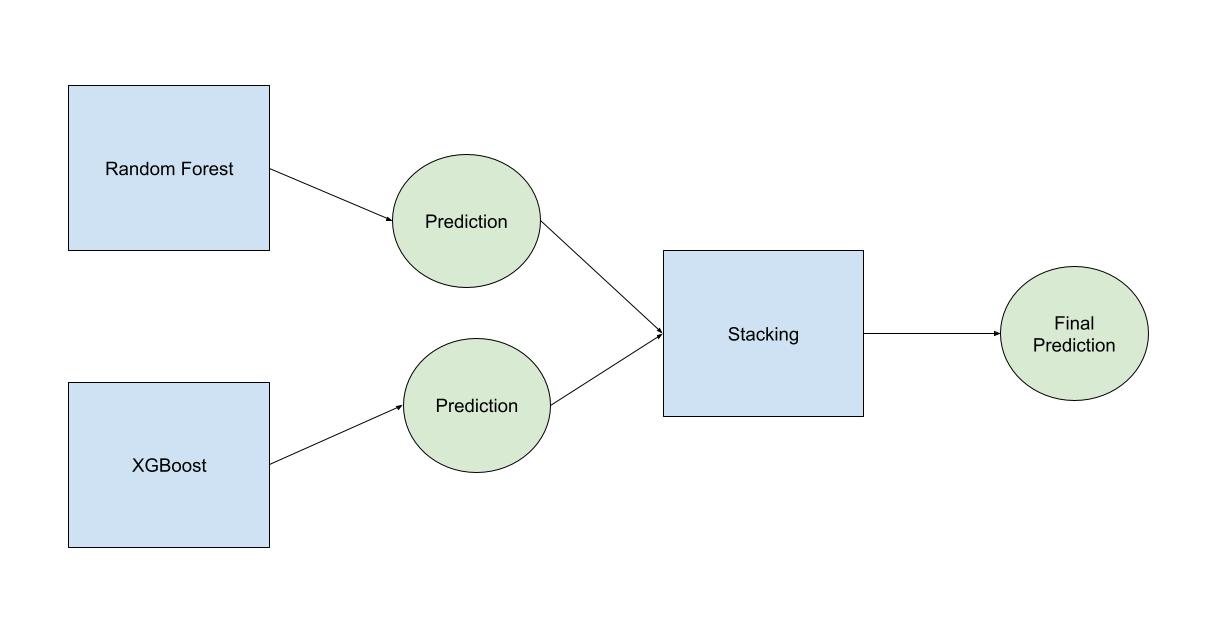

In [17]:
from IPython.display import Image

# Display ensemble method diagram
Image("Ensemble Method Diagram.png")

The ensemble process is relatively simple: each individual model (Random Forest and XGBoost in the case of the Q1 ensemble) produces a prediction, these predictions are aggregated using a technique like max voting or stacking, and then this aggregation technique produces a final prediction for the ensemble.  

# Tasks 2.8 and 2.9
<b>2.8:</b><i> Implement and execute the ensemble learning model. Explain the intuition behind each mathematical step.</i><br>
<b>2.9:</b><i> Answer the questions you formulated using the results obtained from executing the ensemble model.</i><br>
<b>2.10:</b><i> Interpret the predictions made by the model in the context of the questions you asked.</i>

### Question 1: Can we predict the weather type more reliably using an ensemble model than with a single model alone?

First, we need to fit the random forest and XGBoost models to the training set.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Train XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss")
xgb.fit(x_train, y_train)

# Generate predictions with random forest
rf_pred_train = rf.predict_proba(x_train)[:, 1].reshape(-1, 1)
rf_pred_test = rf.predict_proba(x_test)[:, 1].reshape(-1, 1)

# Generate predictions with XGBoost
xgb_pred_train = xgb.predict_proba(x_train)[:, 1].reshape(-1, 1)
xgb_pred_test = xgb.predict_proba(x_test)[:, 1].reshape(-1, 1)

Now that we have predictions for both the random forest and XGBoost, we can aggregate them and use this aggregation to train the stacking model. This stacking model commonly employs logistic regression, so we will use that. 

In [19]:
from sklearn.linear_model import LogisticRegression

# Create training and testing sets for stacking model
stack_train = np.hstack((rf_pred_train, xgb_pred_train))
stack_test = np.hstack((rf_pred_test, xgb_pred_test))

# Train stacking model
stacker = LogisticRegression()
stacker.fit(stack_train, y_train);

Now that we have the stacker created, all we need to do is make predictions with all three (RF, XGBoost and stacker) and get their accuracy scores. I predict that the stacker will have the highest accuracy score, as it benefits from both the random forest and XGBoost models.

Accuracy is computed using the following formula: 
$Accuracy = \frac{Correct Predictions}{Total Predictions} = \frac{TP + TN}{TP + TN + FP + FN}$, 
where TP is true positives, TN is true negatives, FP is false positives, and FN is false negatives.

In [20]:
from sklearn.metrics import accuracy_score

# Get accuracy of a single random forest
rf_preds = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"RF: {round(rf_accuracy, 5)}")

# Get accuracy of a single XGBoost model
xgb_preds = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGB: {round(xgb_accuracy, 5)}")

# Get accuracy of stacking model
stack_preds = stacker.predict(stack_test)
stack_accuracy = accuracy_score(y_test, stack_preds)
print(f"STACK: {round(stack_accuracy, 5)}")

RF: 0.91326
XGB: 0.91023
STACK: 0.46515


The stacking model did not yield any improvements in accuracy, and in fact reduced accuracy compared to the individual models by about half. This could be because of technical or logical issues beyond the scope of this assignment. Regardless, both the random forest and XGBoost models achieve an accuracy of over 90%, meaning they are already highly effective at prediction on their own, making an ensemble method unnecessary for this task. 

To answer the original question, it is plausible that an ensemble model could improve the accuracy of predictions as opposed to a single model by itself, but the particular ensemble configuration I used does not seem to yield the results we want. Thus, it is not guaranteed that weather is more effectively predicted by an ensemble than by an individual model like a random forest or XGBoost. 

### Question 2: Can an ensemble model reduce prediction variance compared to a single model?

Here, I will be training instances of the Random Forest, XGBoost, Support Vector Machine (SVM), Logistic Regression and K-Nearest Neighbors models, aggregating these results using max voting, and comparing them to those of each individual model. We can reuse the random forest and XGBoost models defined in the first problem, and the remaining three should be straightforward to train. From there, we can apply max voting to combine the predictions of the five models. We will then compare the prediction variance of the overall model with that of each individual model.

As a brief overview of the model types not already described in this assignment: 
* A <b>Support Vector Machine (SVM)</b> is a supervised learning model that finds the optimal hyperplane which separates data into different classes. It does this through the use of support vectors, and can use what is known as the "kernel trick" to project nonlinear data into higher-dimensional spaces where it becomes linearly separable.
* A <b>Logistic Regression</b> model is used to classify data points by applying a logistic function to a linear combination of features, resulting in clear and interpretable decision boundaries.
* Finally, <b>K-Nearest Neighbors (KNN)</b> is an algorithm that classifies a data point based on the most common class among the k nearest data points in the feature space. It is simple to deploy due to its lack of parameters, but is still highly effective for classification tasks.

In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Train SVM and calculate accuracy score
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(x_train, y_train)
svm_preds = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Train logistic regression model
log = LogisticRegression(random_state=42, max_iter=1000)
log.fit(x_train, y_train)
log_preds = log.predict(x_test)
log_accuracy = accuracy_score(y_test, log_preds)

# Train k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Function to print model accuracies to n decimal places
def print_model_accuracies(n): 
    print("INDIVIDUAL MODEL ACCURACIES")
    print(f"RF: {round(rf_accuracy, n)}")
    print(f"XGB: {round(xgb_accuracy, n)}")
    print(f"SVM: {round(svm_accuracy, n)}")
    print(f"LOG: {round(log_accuracy, n)}")
    print(f"KNN: {round(knn_accuracy, n)}")

# Show model accuracies
print_model_accuracies(5)

INDIVIDUAL MODEL ACCURACIES
RF: 0.91326
XGB: 0.91023
SVM: 0.89924
LOG: 0.86932
KNN: 0.89129


Straight away, we can see that the new SVM, logistic regression and k-nearest neighbors models are all pretty accurate, though not quite as much so as the existing random forest and XGBoost models. Let's calculate the prediction variance of all five models using cross-validation. 

Variance is calculated using this formula: $Variance = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$, where $N$ is the number of predictions, $x_i$ is the $i$th prediction, and $\mu$ is the mean of those predictions.


In [22]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Function to calculate prediction variance
def calculate_prediction_variance(model, x, y, cv): 
    preds = cross_val_predict(model, x, y, cv=cv, method="predict")
    pred_var = np.var(preds)
    return pred_var

# Initialize stratified k-fold validation object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calculate prediction variance for each model
rf_var = calculate_prediction_variance(rf, x_test, y_test, cv)
xgb_var = calculate_prediction_variance(xgb, x_test, y_test, cv)
svm_var = calculate_prediction_variance(svm, x_test, y_test, cv)
log_var = calculate_prediction_variance(log, x_test, y_test, cv)
knn_var = calculate_prediction_variance(knn, x_test, y_test, cv)

# Function to print model prediction variances to n decimal places
def print_model_variances(n): 
    print("INDIVIDUAL MODEL VARIANCES")
    print(f"RF: {round(rf_var, n)}")
    print(f"XGB: {round(xgb_var, n)}")
    print(f"SVM: {round(svm_var, n)}")
    print(f"LOG: {round(log_var, n)}")
    print(f"KNN: {round(knn_var, n)}")

# Show model variances
print_model_variances(5)

INDIVIDUAL MODEL VARIANCES
RF: 1.23556
XGB: 1.22679
SVM: 1.23856
LOG: 1.2031
KNN: 1.24489


Now let's create the ensemble and see how its accuracy compares to that of each individual model. 

In [23]:
from sklearn.ensemble import VotingClassifier

# Create ensemble
ensemble = VotingClassifier(estimators=[
    ("rf", rf), ("xgb", xgb), ("svm", svm), ("log", log), ("knn", knn)], voting="hard")

# Train ensemble
ensemble.fit(x_train, y_train)

# Generate ensemble predictions
ensemble_preds = ensemble.predict(x_test)

In [24]:
# Display ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble accuracy: {round(ensemble_accuracy, 5)}")
print()
print_model_accuracies(5)

Ensemble accuracy: 0.90341

INDIVIDUAL MODEL ACCURACIES
RF: 0.91326
XGB: 0.91023
SVM: 0.89924
LOG: 0.86932
KNN: 0.89129


The ensemble model is highly accurate at over 90%, but its performance falls short of the random forest and XGBoost models by themselves.

In [25]:
# Calculate ensemble prediction variance
ensemble_var = calculate_prediction_variance(ensemble, x_test, y_test, cv)

# Display ensemble prediction variance
print(f"Ensemble variance: {round(ensemble_var, 5)}")
print()
print_model_variances(5)

Ensemble variance: 1.23201

INDIVIDUAL MODEL VARIANCES
RF: 1.23556
XGB: 1.22679
SVM: 1.23856
LOG: 1.2031
KNN: 1.24489


The ensemble has a lower variance than a random forest, SVM or KNN model, but higher variance than an XGBoost or logistic regression model. Therefore, this particular ensemble does not guarantee a lower prediction variance when predicting the weather type compared to an individual model. 

It seems that a single XGBoost model performs better than this ensemble in terms of both accuracy and prediction variance, so that could be the best overall model type to employ for this kind of task going forward. 

# Task 2.11
<i>Validate your model using relevant validation metrics such as a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.</i>

Here, we will validate the models from each task that yielded the best results. The random forest achieved the best accuracy for Q1, almost twice that of the stacking model, and the XGBoost model had a higher accuracy and lower variance than the ensemble on Q2, so validation of these models' performances makes the most sense. 

### Validating the random forest

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Show RF accuracy again
print(f"RF accuracy: {round(rf_accuracy, 5)} ({round(rf_accuracy*100, 3)}%)")
print()

# Generate RF confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
print(f"Random Forest Confusion Matrix\n{rf_cm}")

RF accuracy: 0.91326 (91.326%)

Random Forest Confusion Matrix
[[589  34  17  11]
 [ 37 584   6  20]
 [ 18  15 658  10]
 [ 22  19  20 580]]


To interpret this confusion matrix, we'll need to look at the original label values and match them with encoded label values.

In [27]:
# Find mapping of original weather types to encoded values
print(f"Original label values: {original_label_values}")
print(f"Encoded label values: {encoded_label_values}")

Original label values: ['rainy' 'cloudy' 'sunny' 'snowy']
Encoded label values: [1 0 3 2]


We see that cloudy = 0, rainy = 1, snowy = 2, and sunny = 3. Thus, the confusion matrix looks like this: 

<table>
    <tr>
        <td></td>
        <td>Pred. Cloudy</td>
        <td>Pred. Rainy</td>
        <td>Pred. Snowy</td>
        <td>Pred. Sunny</td>
    </tr>
    <tr>
        <td>Act. Cloudy</td>
        <td>589</td>
        <td>34</td>
        <td>17</td>
        <td>11</td>
    </tr>
    <tr>
        <td>Act. Rainy</td>
        <td>37</td>
        <td>584</td>
        <td>6</td>
        <td>20</td>
    </tr>
    <tr>
        <td>Act. Snowy</td>
        <td>18</td>
        <td>15</td>
        <td>658</td>
        <td>10</td>
    </tr>
    <tr>
        <td>Act. Sunny</td>
        <td>22</td>
        <td>19</td>
        <td>20</td>
        <td>580</td>
    </tr>
    </table>

The values on the main diagonal indicate correct predictions and are by far the largest, putting the confusion matrix in line with the accuracy score from earlier. Misclassifications of the weather as cloudy when it was actually rainy and vice versa are more common than other types of misclassifications, but this is understandable given the high overlap in conditions between cloudy and rainy weather.

We will wrap up our evaluation of the random forest by performing k-fold cross-validation to see how well it generalizes to unseen data.

In [28]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation with 5 folds
rf_cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring="accuracy")

In [29]:
# Display results
print(f"RF CrossVal Scores: {rf_cv_scores}")
print(f"Average CrossVal Score: {round(np.mean(rf_cv_scores), 5)}")
print(f"Accuracy Score: {round(rf_accuracy, 5)}")

RF CrossVal Scores: [0.91761364 0.91382576 0.90814394 0.9157197  0.92045455]
Average CrossVal Score: 0.91515
Accuracy Score: 0.91326


We get an average cross-validation score of about 91.5%, which is pretty close to our accuracy score. Thus, the random forest is highly generalizable to new data, and is thus a powerful tool on its own (outside of an ensemble) for predicting the weather type based on factors like humidity, atmospheric pressure and visibility.

### Validating the XGBoost model

In [30]:
# Show XGB accuracy again
print(f"XGB accuracy: {round(xgb_accuracy, 5)} ({round(xgb_accuracy*100, 3)}%)")
print(f"XGB variance: {round(xgb_var, 5)}")
print()

# Generate XGB confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_preds)
print(f"XGBoost Confusion Matrix\n{xgb_cm}")

XGB accuracy: 0.91023 (91.023%)
XGB variance: 1.22679

XGBoost Confusion Matrix
[[579  38  18  16]
 [ 31 581  21  14]
 [ 17  12 665   7]
 [ 25  20  18 578]]


This is the labeled CM: 

<table>
    <tr>
        <td></td>
        <td>Pred. Cloudy</td>
        <td>Pred. Rainy</td>
        <td>Pred. Snowy</td>
        <td>Pred. Sunny</td>
    </tr>
    <tr>
        <td>Act. Cloudy</td>
        <td>579</td>
        <td>38</td>
        <td>18</td>
        <td>16</td>
    </tr>
    <tr>
        <td>Act. Rainy</td>
        <td>31</td>
        <td>581</td>
        <td>21</td>
        <td>14</td>
    </tr>
    <tr>
        <td>Act. Snowy</td>
        <td>17</td>
        <td>12</td>
        <td>665</td>
        <td>7</td>
    </tr>
    <tr>
        <td>Act. Sunny</td>
        <td>25</td>
        <td>20</td>
        <td>18</td>
        <td>578</td>
    </tr>
</table>

Once again, correct predictions comprise the vast majority of predictions, and predicting rain when it's cloudy and vice versa is more common than other mistakes.

Let's see how well this XGBoost model performs under k-fold cross-validation.

In [31]:
# Perform k-fold cross-validation with 5 folds
xgb_cv_scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring="accuracy")

In [32]:
# Display results
print(f"XGB CrossVal Scores: {xgb_cv_scores}")
print(f"Average CrossVal Score: {round(np.mean(xgb_cv_scores), 5)}")
print(f"Accuracy Score: {round(xgb_accuracy, 5)}")

XGB CrossVal Scores: [0.9157197  0.91145833 0.90909091 0.91382576 0.92045455]
Average CrossVal Score: 0.91411
Accuracy Score: 0.91023


Just like with the random forest, the cross-validation score is right near the accuracy score, and is actually slightly higher. This means that both the random forest and XGBoost models are effective for classification tasks on their own, and do not require the support of additional models within an ensemble.

# Task 2.12
<i>Explain how ensemble system reduced the variance.</i>

The second question was where I explored whether an ensemble could reduce prediction variance compared to a single model alone, and these were the results: 

In [33]:
# Display ensemble prediction variance
print(f"Ensemble variance: {round(ensemble_var, 5)}")
print()
print_model_variances(5)

Ensemble variance: 1.23201

INDIVIDUAL MODEL VARIANCES
RF: 1.23556
XGB: 1.22679
SVM: 1.23856
LOG: 1.2031
KNN: 1.24489


The ensemble had less variance than the SVM, random forest and k-nearest neighbors models by themselves, but the XGBoost and logistic regression models beat it in this area. Thus, the ensemble did not reduce variance compared to each individual model on its own. Based on both accuracy and variance scores for the individual models compared to the ensemble, I conclude that an individual random forest or XGBoost model is superior to the 5-model ensemble I created.

# Task 2.13
<i>Include all mathematical formulas used and graphs representing the final outcomes.</i>

All relevant formulas and graphs have been included in their respective tasks.

# References
* Lutins, E. (2018, June 17). Ensemble Methods in Machine Learning: What are They and Why Use Them? Medium. https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f#:~:text=Ensemble%20methods%20is%20a%20machine%20learning%20technique%20that,in%20order%20to%20produce%20one%20optimal%20predictive%20model.
* What is ensemble learning? | IBM. (n.d.). https://www.ibm.com/topics/ensemble-learning
* Weather Type Classification. (2024, June 23). Kaggle. https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
* OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com/
* Microsoft. (2024). Copilot [Large language model]. https://www.bing.com/?FORM=Z9FD1